<a href="https://colab.research.google.com/github/Dika5767/UASBigDataAndMining_23.11.5767/blob/main/UAS_23.11.5767.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [12]:
import pandas as pd

df = pd.read_csv(
    "/content/sample_data/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_612.csv",
    skiprows=4
)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,568.703452,566.073368,568.141299,548.496602,512.766661,514.341833,501.466616,NaN,NaN,NaN
2,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,215.380351,179.972422,182.920554,188.361690,193.378593,200.861531,203.999368,NaN,NaN,NaN
4,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,331.664900,315.199297,370.736573,410.864566,437.653351,392.355835,392.507047,NaN,NaN,NaN


In [28]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [29]:
df_long = df.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="CO2"
)


In [30]:
df_long = df_long[df_long["Year"].str.isnumeric()]
df_long["Year"] = df_long["Year"].astype(int)


In [31]:
df_long = df_long.dropna()


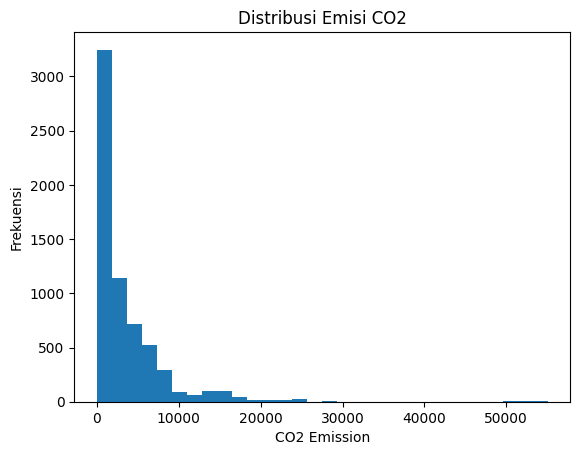

In [32]:
plt.figure()
plt.hist(df_long["CO2"], bins=30)
plt.xlabel("CO2 Emission")
plt.ylabel("Frekuensi")
plt.title("Distribusi Emisi CO2")
plt.show()


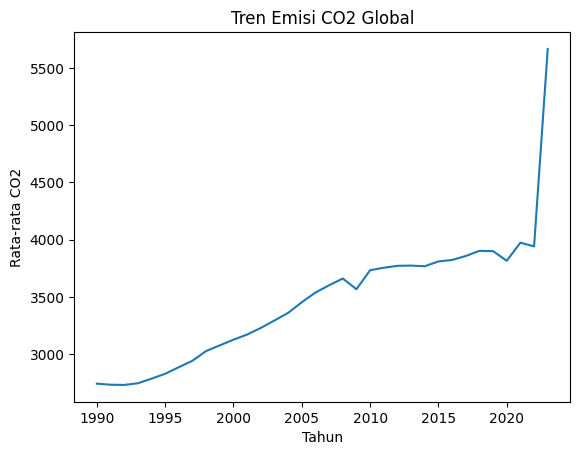

In [33]:
co2_year = df_long.groupby("Year")["CO2"].mean()

plt.figure()
plt.plot(co2_year.index, co2_year.values)
plt.xlabel("Tahun")
plt.ylabel("Rata-rata CO2")
plt.title("Tren Emisi CO2 Global")
plt.show()


In [34]:
X = df_long[["Year"]]
y = df_long["CO2"]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred = model.predict(X_test)


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(2984.176023683204, np.float64(4448.922178269305), 0.010635622233458708)

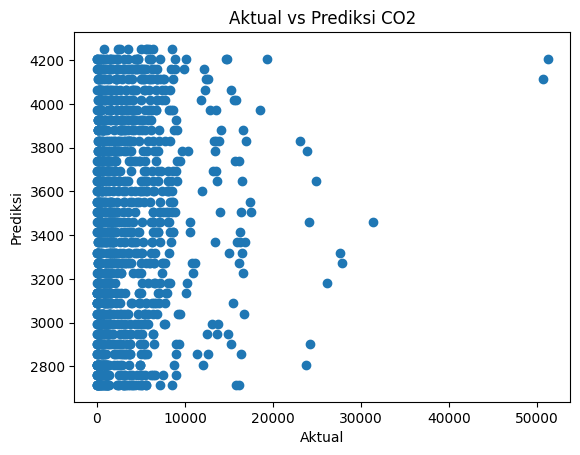

In [39]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Aktual vs Prediksi CO2")
plt.show()


In [40]:
from joblib import dump
dump(model, "model_co2_regression.pkl")


['model_co2_regression.pkl']